<a href="https://colab.research.google.com/github/orlanddoneto/AlgoritmoKNN_futebol/blob/main/Trab3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importações

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados de treino

In [ ]:
jogadores_data = pd.read_csv('jogadores.csv', delimiter=';')
le = LabelEncoder()
#Atacante 0 || Defensor 1
jogadores_data['Classe'] = le.fit_transform(jogadores_data['Classe'])

# Separando os dados gerais (X_train) e o rótulo da classificação (y_train)

In [ ]:
X_train = jogadores_data.drop('Classe', axis=1)
y_train = jogadores_data['Classe']

# Treinando o knn com os dados de treino

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, p = 1)
knn.fit(X_train, y_train)


KNeighborsClassifier(p=1)

# Carregar os dados para validação

In [ ]:
validation_data = pd.read_csv('validacao.csv', delimiter=';')

# Prevendo classes dos dados de validação

In [ ]:
predicted_classes = knn.predict(validation_data)
predicted_classes = le.inverse_transform(predicted_classes)


# Adicionar as classes previstas ao DataFrame original

In [ ]:
validation_data['Classe'] = predicted_classes

Mostra os resultados

In [ ]:
print(validation_data)

     Id  Idade  Altura  Tecnica  Passe  Chute  Forca  Velocidade  Drible  \
0   201     19     186       71     67     52     77          75      65   
1   202     19     175       65     63     66     60          82      70   
2   203     20     181       64     64     67     70          67      68   
3   204     20     170       69     66     70     62          76      75   
4   205     21     176       66     61     68     65          75      72   
5   206     22     171       64     65     66     60          78      71   
6   207     22     176       70     72     70     64          77      77   
7   208     22     188       72     69     50     76          75      65   
8   209     22     180       68     74     67     71          72      71   
9   210     22     177       67     68     69     65          77      73   
10  211     23     185       77     79     65     79          75      79   
11  212     23     178       66     68     65     65          80      76   
12  213     

# Plotar um gráfico de dispersão

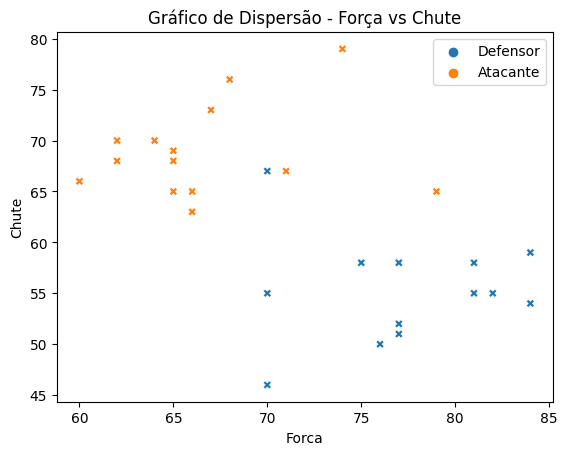

In [ ]:
#sns.scatterplot(data=jogadores_data, x='Forca', y='Chute', hue='Classe', marker='o')
sns.scatterplot(data=validation_data, x='Forca', y='Chute', hue='Classe', marker='X')
plt.title('Gráfico de Dispersão - Força vs Chute')
plt.legend()
plt.show()